# 6. Advanced visualisations

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import gaussian_kde
from PIL import Image

df = pd.read_csv('tidy_df.csv')
img = Image.open('C:\\Users\\etien\\Documents\\udem\\ift6758\\project\\milestone1\\ift6758-project-template-main\\figures\\nhl_rink.png')

In [43]:
def get_left_side_coords(df):
    """for shots from the right side, get corresponding left side coordinates"""
    
    df['x_coordinates_left'] = (df['attacking_team_side'] == 'left') * df['x_coordinates']  - (df['attacking_team_side'] == 'right') * df['x_coordinates']
    df['y_coordinates_left'] = (df['attacking_team_side'] == 'left') * df['y_coordinates']  - (df['attacking_team_side'] == 'right') * df['y_coordinates']
    
    return df

In [44]:
df = get_left_side_coords(df)

# filter out shots that happen on the other side of the red line (these shots are too rare to be interesting)
df = df[df['x_coordinates_left'] > 0]
# crop image in half
img = img.crop((img.size[0]/2, 0, img.size[0], img.size[1]))

In [45]:
n1=11
n2=11
kernel_bw=1
diff_method = 'absolute'

In [46]:
df = df[(~df['x_coordinates_left'].isnull()) & (~df['y_coordinates_left'].isnull())]
xy_coords =  df[['x_coordinates_left','y_coordinates_left']].to_numpy().T
kernel = gaussian_kde(xy_coords, bw_method = kernel_bw)

x = np.linspace(0, 100, n1)
y = np.linspace(-42.5, 42.5, n2)
xy = np.array(np.meshgrid(x, y)).reshape(2,-1)
prob_density_grid = kernel(xy)

In [48]:
df_leafs = df[df['attacking_team'] == 'Toronto Maple Leafs']
df_sens = df[df['attacking_team'] == 'Ottawa Senators']

kernel_leafs = gaussian_kde(df_leafs[['x_coordinates_left','y_coordinates_left']].to_numpy().T, bw_method = kernel_bw)
kernel_sens = gaussian_kde(df_sens[['x_coordinates_left','y_coordinates_left']].to_numpy().T, bw_method = kernel_bw)

xy_kernel_leafs = kernel_leafs(xy)
xy_kernel_sens = kernel_sens(xy)

#if diff_method == 'absolute':
#    leafs_diff = xy_kernel_leafs-prob_density_grid
#    sens_diff = xy_kernel_sens-prob_density_grid

#elif diff_method == 'percentage':
leafs_diff = 100*(xy_kernel_leafs/prob_density_grid -1)
sens_diff = 100*(xy_kernel_sens/prob_density_grid -1)

In [50]:
print(prob_density_grid)
print(xy_kernel_leafs)
print(leafs_diff)

[6.28488533e-06 1.32682121e-05 2.44460362e-05 3.86740511e-05
 5.25925158e-05 6.24351489e-05 6.56660550e-05 6.11195134e-05
 4.93426074e-05 3.35288310e-05 1.86179829e-05 8.75754634e-06
 1.87617331e-05 3.49942715e-05 5.60502510e-05 7.74902604e-05
 9.42379003e-05 1.02342494e-04 9.87419584e-05 8.24672096e-05
 5.76162094e-05 3.26499572e-05 1.07836843e-05 2.33883916e-05
 4.41199867e-05 7.16228357e-05 1.01000632e-04 1.26448937e-04
 1.42453372e-04 1.42782818e-04 1.23267215e-04 8.83032816e-05
 5.08912281e-05 1.20749535e-05 2.64246314e-05 5.03220007e-05
 8.27746472e-05 1.19154217e-04 1.53640369e-04 1.79239545e-04
 1.85772779e-04 1.64731571e-04 1.20220317e-04 7.00810567e-05
 1.26990387e-05 2.79376788e-05 5.35579867e-05 8.90178333e-05
 1.30263748e-04 1.71782351e-04 2.05426652e-04 2.17609013e-04
 1.96057531e-04 1.44508417e-04 8.46730691e-05 1.28944205e-05
 2.84228951e-05 5.46429947e-05 9.12302276e-05 1.34375861e-04
 1.78603070e-04 2.15163899e-04 2.29121545e-04 2.06975184e-04
 1.52621785e-04 8.932379

In [19]:
print(xy_kernel_leafs)

[3.40883159e-06 8.02380537e-06 1.63276625e-05 2.81181689e-05
 4.12430918e-05 5.28260538e-05 6.00148305e-05 5.97574239e-05
 5.04950226e-05 3.49367446e-05 1.91961042e-05 5.02306276e-06
 1.19509896e-05 2.44880717e-05 4.25432745e-05 6.35029515e-05
 8.37653988e-05 9.88179372e-05 1.02186225e-04 8.90736799e-05
 6.29429092e-05 3.49564009e-05 6.50277531e-06 1.55573410e-05
 3.20397246e-05 5.62732237e-05 8.59477783e-05 1.17527911e-04
 1.44596064e-04 1.55308457e-04 1.39174362e-04 9.99194365e-05
 5.57842940e-05 7.69534454e-06 1.83812828e-05 3.79202652e-05
 6.73114083e-05 1.05274607e-04 1.49066659e-04 1.90274609e-04
 2.10448226e-04 1.91990329e-04 1.38798487e-04 7.73410814e-05
 8.66042393e-06 2.05354443e-05 4.22586147e-05 7.54568022e-05
 1.19901659e-04 1.73595979e-04 2.26216175e-04 2.53495540e-04
 2.32217478e-04 1.67289631e-04 9.23582981e-05 9.48607247e-06
 2.23123612e-05 4.56380570e-05 8.12413843e-05 1.29030583e-04
 1.86775106e-04 2.42688913e-04 2.70050423e-04 2.44698377e-04
 1.73855233e-04 9.447578

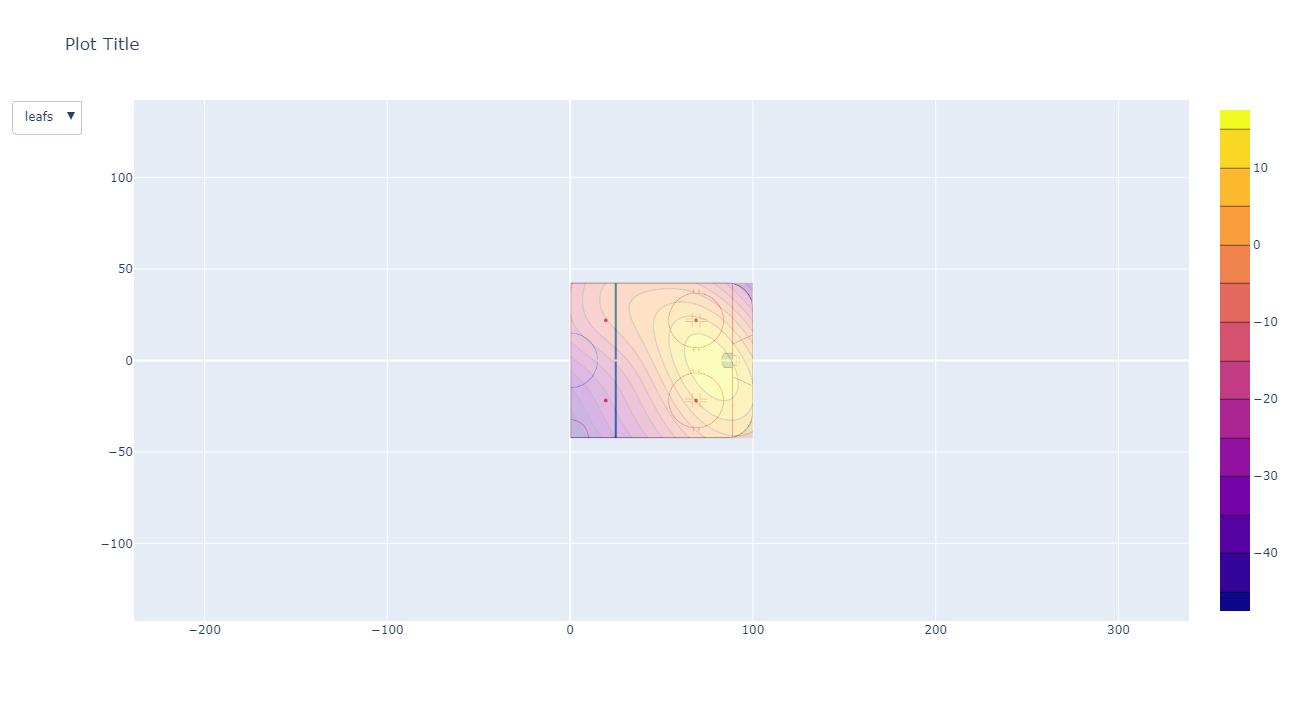

In [36]:
fig = go.Figure()

fig.add_trace(go.Contour(
                   z=leafs_diff.reshape(n2,n1),
                   x=x,
                   y=y,
                   hoverongaps = False,
                   opacity = 0.3,
#                   zmin=-30, zmax=30
)
             )

updatemenus = [
    {
        'buttons': [
            {
                'method': 'restyle',
                'label': 'leafs',
                'args': [
                    {'z': [leafs_diff.reshape(n2,n1)]},
                ]
            },
            {
                'method': 'restyle',
                'label': 'sens',
                'args': [
                    {'z': [sens_diff.reshape(n2,n1)]},
                ]
            }
        ],
        'direction': 'down',
        'showactive': True,
    }
]

fig.layout = go.Layout(
    updatemenus=updatemenus,
    title="Plot Title"
)

img_width = img.size[0]
img_height = img.size[1]
scale_factor = 1/5.5


fig.update_xaxes(
    visible=True,
    #range=[0, 100 ]
    range=[-100, 200 ]
)

fig.update_yaxes(
    visible=True,
    range=[-142.5, 142.5],
    # the scaleanchor attribute ensures that the aspect ratio stays constant
    scaleanchor="x"
)

# Add images
fig.add_layout_image(
        dict(
            source=img,
            xref="x",
            yref="y",
            x=0,
            sizex=img_width * scale_factor,
            y=42.5,
            sizey=img_height * scale_factor,
            sizing="stretch",
            opacity=1,
            layer="below"
        )
)

fig.update_layout(
    autosize=False,
    width=img_width*1.5,
    height=img_height*1.5)

fig.show()

In [19]:
df.head()

Unnamed: 0     game_id    season season_type        home_team  \
0           0  2016020001  20162017           R  Ottawa Senators   
1           1  2016020001  20162017           R  Ottawa Senators   
2           2  2016020001  20162017           R  Ottawa Senators   
3           3  2016020001  20162017           R  Ottawa Senators   
4           4  2016020001  20162017           R  Ottawa Senators   

             away_team home_team_side_1st_period       attacking_team  \
0  Toronto Maple Leafs                      left  Toronto Maple Leafs   
1  Toronto Maple Leafs                      left      Ottawa Senators   
2  Toronto Maple Leafs                      left      Ottawa Senators   
3  Toronto Maple Leafs                      left      Ottawa Senators   
4  Toronto Maple Leafs                      left  Toronto Maple Leafs   

  attacking_player             goalie  ...  x_coordinates y_coordinates  \
0  Mitchell Marner     Craig Anderson  ...          -77.0           5.0   
1      Chris Kelly  Frederik Andersen  ...           86.0          13.0   
2        Cody Ceci  Frederik Andersen  ...           23.0         -38.0   
3    Erik Karlsson  Frederik Andersen  ...           33.0         -15.0   
4  Martin Marincin     Craig Anderson  ...          -34.0          28.0   

    shot_type  empty_net  strength  gwg distance_from_net attacking_team_side  \
0  Wrist Shot        NaN       NaN  NaN         13.000000               right   
1  Wrist Shot        NaN       NaN  NaN         13.341664                left   
2  Wrist Shot        NaN       NaN  NaN         76.157731                left   
3   Slap Shot        NaN       NaN  NaN         57.974132                left   
4  Wrist Shot        NaN       NaN  NaN         61.717096               right   

  x_coordinates_left y_coordinates_left  
0               77.0               -5.0  
1               86.0               13.0  
2               23.0              -38.0  
3               33.0              -15.0  
4               34.0              -28.0  

[5 rows x 24 columns]

## draft
Refactor above code into functions, get data for all teams, normalise by minutes played

In [79]:
teams = set(df['attacking_team'])
seasons = set(df['season'])
teams = ['Toronto Maple Leafs', 'Ottawa Senators']
seasons = [20192020, 20202021]
n1=101
n2=101
kernel_bw=0.5
diff_method = 'absolute'

In [87]:
#teams_season_aggregate_shots = df.value_counts(subset = ['season','attacking_team']).to_frame()
#teams_per_season = df.groupby('season')['attacking_team'].nunique().to_frame()
#teams_season_aggregate_shots = df.value_counts(subset = ['season']).to_frame()
output_df = pd.DataFrame()

x = np.linspace(0, 100, n1)
y = np.linspace(-42.5, 42.5, n2)
xy = np.array(np.meshgrid(x, y)).reshape(2,-1)

for season in seasons:
    
    xy_coords_season =  df[df['season'] == season][['x_coordinates_left','y_coordinates_left']].to_numpy().T
    
    kernel_season = gaussian_kde(xy_coords_season, bw_method = kernel_bw)
    prob_density_grid_season = kernel_season(xy)
    
    for team in teams:
        df_team_season = df[(df['attacking_team'] == team) & (df['season'] == season)]
        if len(df_team_season) > 0:
            
            kernel_team_season = gaussian_kde(df_team_season[['x_coordinates_left','y_coordinates_left']].to_numpy().T, bw_method = kernel_bw)
            prob_density_grid_team_season = kernel_team_season(xy)

            team_season_differential = 100*(prob_density_grid_team_season/prob_density_grid_season -1)
            
            #TODO: normalise
            
            output_df[f"{season} {team}"] = team_season_differential

In [88]:
output_df.head()

20192020 Toronto Maple Leafs  20192020 Ottawa Senators  \
0                    -29.973762                 -7.751280   
1                    -29.151903                 -7.045372   
2                    -28.459044                 -6.274974   
3                    -27.902087                 -5.445860   
4                    -27.485457                 -4.565831   

   20202021 Toronto Maple Leafs  20202021 Ottawa Senators  
0                     22.265541                 10.029534  
1                     21.272788                 11.323840  
2                     19.583761                 12.641951  
3                     17.182797                 13.991121  
4                     14.066424                 15.377356

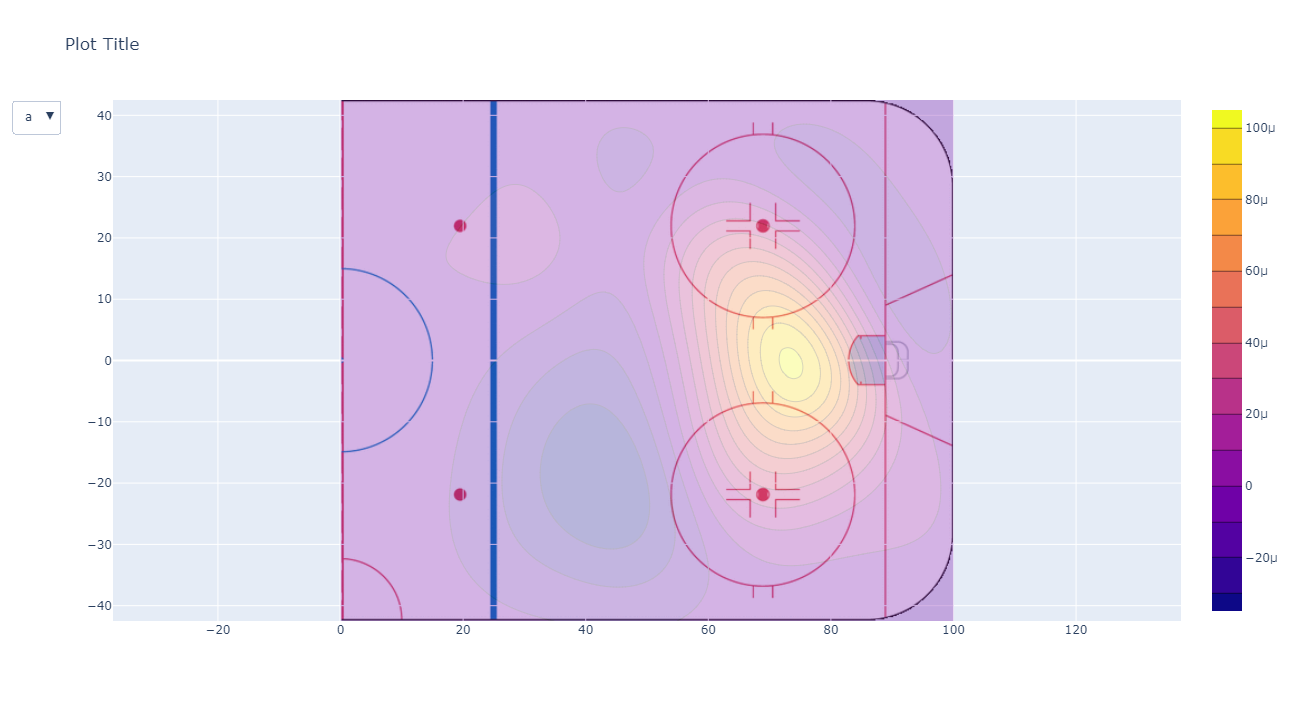

In [90]:
fig = go.Figure()

fig.add_trace(go.Contour(
                   z=leafs_diff.reshape(n2,n1),
                   x=x,
                   y=y,
                   hoverongaps = False,
                   opacity = 0.3,
#                   zmin=-30, zmax=30
)
             )

updatemenus = [
    {
        'buttons': [
            {
                'method': 'restyle',
                'label': 'a',
                'args': [
                    {'z': np.array(output_df['20192020 Toronto Maple Leafs']).reshape(n2,n1)},
                ]
            },
            {
                'method': 'restyle',
                'label': 'b',
                'args': [
                    {'z': np.array(output_df['20202021 Toronto Maple Leafs']).reshape(n2,n1)},
                ]
            },
            {
                'method': 'restyle',
                'label': 'c',
                'args': [
                    {'z': np.array(output_df['20192020 Ottawa Senators']).reshape(n2,n1)},
                ]
            },
            {
                'method': 'restyle',
                'label': 's',
                'args': [
                    {'z': np.array(output_df['20202021 Ottawa Senators']).reshape(n2,n1)},
                ]
            },
        ],
        'direction': 'down',
        'showactive': True,
    }
]

fig.layout = go.Layout(
    updatemenus=updatemenus,
    title="Plot Title"
)

img_width = img.size[0]
img_height = img.size[1]
scale_factor = 1/5.5


fig.update_xaxes(
    visible=True,
    range=[0, 100 ]
)

fig.update_yaxes(
    visible=True,
    range=[-42.5, 42.5],
    # the scaleanchor attribute ensures that the aspect ratio stays constant
    scaleanchor="x"
)

# Add images
fig.add_layout_image(
        dict(
            source=img,
            xref="x",
            yref="y",
            x=0,
            sizex=img_width * scale_factor,
            y=42.5,
            sizey=img_height * scale_factor,
            sizing="stretch",
            opacity=1,
            layer="below"
        )
)

fig.update_layout(
    autosize=False,
    width=img_width*1.5,
    height=img_height*1.5)

fig.show()

In [91]:
team_season_differential.shape

(10201,)

In [65]:
output_df = pd.DataFrame()

In [59]:
a = df.value_counts(subset = ['season']).to_frame().sort_index() #/df.groupby('season')['attacking_team'].nunique().to_frame()['attacking_team']

In [60]:
b = df.groupby('season')['attacking_team'].nunique().to_frame().sort_index() #['attacking_team']

In [54]:
a[0].divide(b['attacking_team'])

TypeError: 'int' object is not iterable

In [61]:
a = pd.Series(a[0])/pd.Series(b['attacking_team'])

TypeError: 'int' object is not iterable

In [63]:
len(a[0])

5

In [64]:
len(b['attacking_team'])

5

In [57]:
a/pd.Series()

season  
20162017    79286
20172018    83217
20182019    81858
20192020    68770
20202021    55088
Name: 0, dtype: int64

In [36]:
df.groupby('season')['attacking_team'].nunique().to_frame()

attacking_team
season                  
20162017              30
20172018              31
20182019              31
20192020              31
20202021              31

In [40]:
df.value_counts(subset = ['season']).to_frame()[0]/df.groupby('season')['attacking_team'].nunique().to_frame()['attacking_team']

TypeError: 'int' object is not iterable

In [ ]:
def get_left_side_coords(df):
    """for shots from the right side, get corresponding left side coordinates"""
    
    df['x_coordinates_left'] = (df['attacking_team_side'] == 'left') * df['x_coordinates']  - (df['attacking_team_side'] == 'right') * df['x_coordinates']
    df['y_coordinates_left'] = (df['attacking_team_side'] == 'left') * df['y_coordinates']  - (df['attacking_team_side'] == 'right') * df['y_coordinates']
    
    return df

In [ ]:
def get_total_shots(df):
    
    team_season_totals = df[['season','attacking_team']].value_couts
    
    season_average = 
            
    
    for df in 

    
    return df

In [31]:
a = df.value_counts(subset = ['season','attacking_team']).to_frame()

In [ ]:
a[]

In [13]:
def prepare_shotmap_data(df, n1=101, n2=101, kernel_bw=0.5):
    
    df_copy = df.copy()
    
    # filter out playoffs : since we are looking at aggregate stats instead of scaling by time (as stated on piazza), 
    # it doesn't make sense to include playoffs when copmaring teams who have not all made it ro 
    #df_copy = df_copy[df_copy['game_id'].astype(str).str.slice(4,6) == '02']
    df_copy = df_copy[(~df_copy['x_coordinates'].isnull()) & (~df_copy['y_coordinates'].isnull())]
    
    df_copy = get_left_side_coords(df_copy)
    
    # filter out shots that happen on the other side of the red line (these shots are too rare to be interesting)
    df_copy = df_copy[df_copy['x_coordinates_left'] > 0]
    
    df_copy[df_copy['attacking_team'].isin(['Toronto Maple Leafs', 'Ottawa Senators'])]
    
    
    
    output_df = pd.DataFrame()
    x = np.linspace(0, 100, n1)
    y = np.linspace(-42.5, 42.5, n2)
    xy = np.array(np.meshgrid(x, y)).reshape(2,-1)

    for season in seasons:

        xy_coords_season =  df_copy[df_copy['season'] == season][['x_coordinates_left','y_coordinates_left']].to_numpy().T
        kernel_season = gaussian_kde(xy_coords_season, bw_method = kernel_bw)
        prob_density_grid_season = kernel_season(xy)
        print(prob_density_grid_season)

        for team in teams:
            
            df_team_season = df_copy[(df_copy['attacking_team'] == team) & (df_copy['season'] == season)]
            
            if len(df_team_season) > 0:

                kernel_team_season = gaussian_kde(df_team_season[['x_coordinates_left','y_coordinates_left']].to_numpy().T, bw_method = kernel_bw)
                prob_density_grid_team_season = kernel_team_season(xy)
                team_season_differential = 100*(prob_density_grid_team_season/prob_density_grid_season -1)

                #TODO: normalise

                output_df[f"{season} {team}"] = team_season_differential
                
    return output_df
    
    

In [51]:
def prepare_shotmap_data(df, n1=101, n2=101, kernel_bw=1):
    
    df_copy = df.copy()
    
    # filter out playoffs : since we are looking at aggregate stats instead of scaling by time (as stated on piazza), 
    # it doesn't make sense to include playoffs when copmaring teams who have not all made it ro 
    #df_copy = df_copy[df_copy['game_id'].astype(str).str.slice(4,6) == '02']
    df_copy = df_copy[(~df_copy['x_coordinates'].isnull()) & (~df_copy['y_coordinates'].isnull())]
    
    df_copy = get_left_side_coords(df_copy)
    
    # filter out shots that happen on the other side of the red line (these shots are too rare to be interesting)
    df_copy = df_copy[df_copy['x_coordinates_left'] > 0]
    
    #df_copy[df_copy['attacking_team'].isin(['Toronto Maple Leafs', 'Ottawa Senators'])]

    
    
    output_df = pd.DataFrame()
    x = np.linspace(0, 100, n1)
    y = np.linspace(-42.5, 42.5, n2)
    xy = np.array(np.meshgrid(x, y)).reshape(2,-1)


    xy_coords_season =  df_copy[['x_coordinates_left','y_coordinates_left']].to_numpy().T
    kernel_season = gaussian_kde(xy_coords_season, bw_method = kernel_bw)
    prob_density_grid_season = kernel_season(xy)
    print(prob_density_grid_season)

    for team in teams:

        df_team_season = df_copy[(df_copy['attacking_team'] == team)] # & (df_copy['season'] == season)

        if len(df_team_season) > 0:

            kernel_team_season = gaussian_kde(df_team_season[['x_coordinates_left','y_coordinates_left']].to_numpy().T, bw_method = kernel_bw)
            prob_density_grid_team_season = kernel_team_season(xy)
            team_season_differential = 100*(prob_density_grid_team_season/prob_density_grid_season -1)
            print(prob_density_grid_team_season)

            #TODO: normalise

            season = '20202021'
            output_df[f"{season} {team}"] = team_season_differential
                
    return output_df
    
    

In [52]:
x = np.linspace(0, 100, 21)
y = np.linspace(-42.5, 42.5, 21)
teams = ['Toronto Maple Leafs', 'Ottawa Senators']

In [53]:
output_df = prepare_shotmap_data(df, n1=11, n2=11, kernel_bw=1)

[6.28488533e-06 1.32682121e-05 2.44460362e-05 3.86740511e-05
 5.25925158e-05 6.24351489e-05 6.56660550e-05 6.11195134e-05
 4.93426074e-05 3.35288310e-05 1.86179829e-05 8.75754634e-06
 1.87617331e-05 3.49942715e-05 5.60502510e-05 7.74902604e-05
 9.42379003e-05 1.02342494e-04 9.87419584e-05 8.24672096e-05
 5.76162094e-05 3.26499572e-05 1.07836843e-05 2.33883916e-05
 4.41199867e-05 7.16228357e-05 1.01000632e-04 1.26448937e-04
 1.42453372e-04 1.42782818e-04 1.23267215e-04 8.83032816e-05
 5.08912281e-05 1.20749535e-05 2.64246314e-05 5.03220007e-05
 8.27746472e-05 1.19154217e-04 1.53640369e-04 1.79239545e-04
 1.85772779e-04 1.64731571e-04 1.20220317e-04 7.00810567e-05
 1.26990387e-05 2.79376788e-05 5.35579867e-05 8.90178333e-05
 1.30263748e-04 1.71782351e-04 2.05426652e-04 2.17609013e-04
 1.96057531e-04 1.44508417e-04 8.46730691e-05 1.28944205e-05
 2.84228951e-05 5.46429947e-05 9.12302276e-05 1.34375861e-04
 1.78603070e-04 2.15163899e-04 2.29121545e-04 2.06975184e-04
 1.52621785e-04 8.932379

In [54]:
output_df.head()

20202021 Toronto Maple Leafs  20202021 Ottawa Senators
0                    -45.761435                 34.971529
1                    -39.526100                 23.557296
2                    -33.209366                 13.997991
3                    -27.294483                  7.455882
4                    -21.579922                  3.887964

In [27]:
n1=101
n2=101

In [119]:
[{'method': 'restyle', 'label': col,'args': [{'z': np.array(output_df[col]).reshape(n2,n1)}]} for col in output_df.columns]

[{'method': 'restyle',
  'label': '20202021 Toronto Maple Leafs',
  'args': [{'z': array([[ 11.06459345,   4.82599409, -20.62527292, -52.97265266,
            -71.11554877, -72.3871909 , -67.52379302, -62.03921421,
            -56.55090871, -50.61383615, -44.41676095, -38.98900187,
            -35.6691171 , -35.57771886, -38.66940219, -43.02748561,
            -45.8737758 , -45.55237224, -42.69782303, -39.89380935,
            -40.12364701],
           [  0.27521998,  -7.88969773, -31.46947629, -57.44944758,
            -68.57492224, -66.36922214, -60.91724449, -56.14094276,
            -51.90167059, -47.13621812, -41.24630952, -34.9699379 ,
            -30.29799655, -29.15608782, -31.69646926, -35.74887372,
            -38.39734994, -38.30207947, -36.63095243, -36.1150532 ,
            -39.21260413],
           [-17.89865787, -25.81496342, -44.368886  , -61.47947112,
            -65.18691929, -60.15818761, -54.68342527, -50.99189904,
            -48.26798038, -44.81717457, -39.2083044

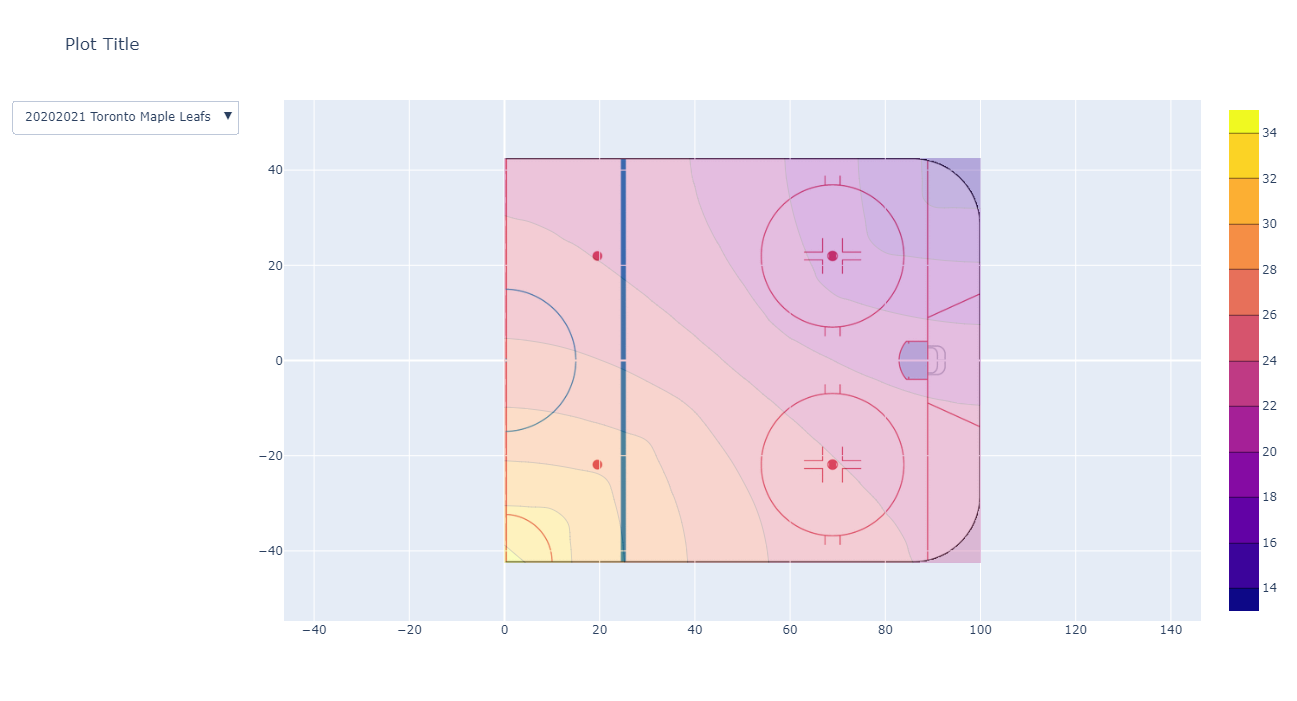

In [28]:
img = Image.open('C:\\Users\\etien\\Documents\\udem\\ift6758\\project\\milestone1\\ift6758-project-template-main\\figures\\nhl_rink.png')
img = img.crop((img.size[0]/2, 0, img.size[0], img.size[1]))

fig = go.Figure()

fig.add_trace(go.Contour(
                   z=output_df['20202021 Ottawa Senators'],
                   x=x,
                   y=y,
                   hoverongaps = False,
                   opacity = 0.3,
#                   zmin=-30, zmax=30
)
             )

updatemenus = [
    {
        'buttons': 
           [{'method': 'restyle', 'label': col,'args': [{'z': np.array(output_df[col]).reshape(n2,n1)}]} for col in output_df.columns],
        'direction': 'down',
        'showactive': True,
    }
]

fig.layout = go.Layout(
    updatemenus=updatemenus,
    title="Plot Title"
)

img_width = img.size[0]
img_height = img.size[1]
scale_factor = 1/5.5


fig.update_xaxes(
    visible=True,
    range=[0, 100 ]
)

fig.update_yaxes(
    visible=True,
    range=[-42.5, 42.5],
    # the scaleanchor attribute ensures that the aspect ratio stays constant
    scaleanchor="x"
)

# Add images
fig.add_layout_image(
        dict(
            source=img,
            xref="x",
            yref="y",
            x=0,
            sizex=img_width * scale_factor,
            y=42.5,
            sizey=img_height * scale_factor,
            sizing="stretch",
            opacity=1,
            layer="below"
        )
)

fig.update_layout(
    autosize=False,
    width=img_width*1.5,
    height=img_height*1.5)

fig.show()

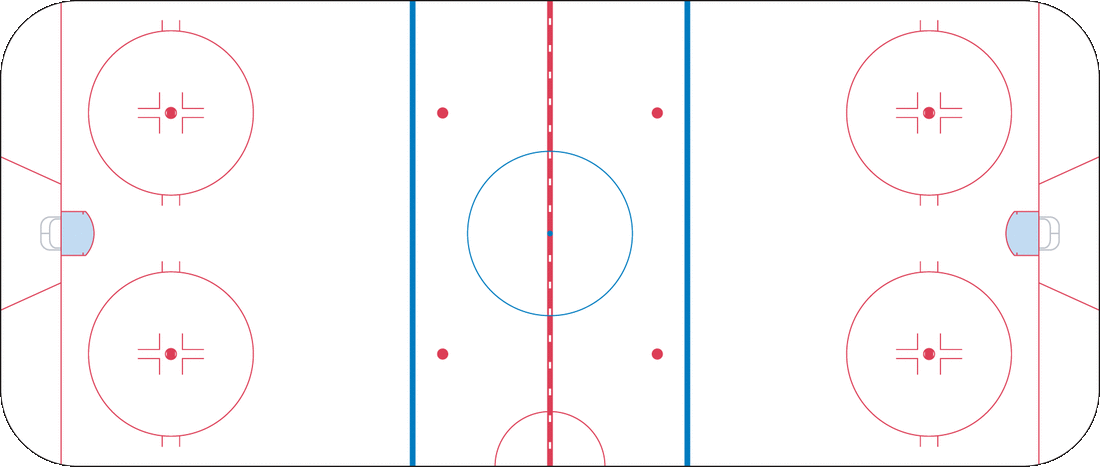

In [27]:
img